In [1]:
%matplotlib inline
from fastai.imports import *
from sklearn.ensemble import RandomForestRegressor

In [2]:
x = np.linspace(0,1); x

array([ 0.     ,  0.02041,  0.04082,  0.06122,  0.08163,  0.10204,  0.12245,  0.14286,  0.16327,  0.18367,
        0.20408,  0.22449,  0.2449 ,  0.26531,  0.28571,  0.30612,  0.32653,  0.34694,  0.36735,  0.38776,
        0.40816,  0.42857,  0.44898,  0.46939,  0.4898 ,  0.5102 ,  0.53061,  0.55102,  0.57143,  0.59184,
        0.61224,  0.63265,  0.65306,  0.67347,  0.69388,  0.71429,  0.73469,  0.7551 ,  0.77551,  0.79592,
        0.81633,  0.83673,  0.85714,  0.87755,  0.89796,  0.91837,  0.93878,  0.95918,  0.97959,  1.     ])

In [11]:
y = x + np.random.uniform(-0.2, 0.2, x.shape); y

array([ 0.08527, -0.09759,  0.10892,  0.19657,  0.08409, -0.02575,  0.26044,  0.26413,  0.33096,  0.11045,
        0.26531,  0.25652,  0.17957,  0.20663,  0.37418,  0.48879,  0.13942,  0.25781,  0.45456,  0.55175,
        0.30521,  0.42965,  0.26182,  0.53468,  0.53539,  0.34797,  0.72239,  0.53667,  0.68439,  0.42944,
        0.51419,  0.61805,  0.73129,  0.58218,  0.61896,  0.72842,  0.72603,  0.81331,  0.95287,  0.9733 ,
        0.68721,  0.8408 ,  0.76418,  1.07494,  1.09707,  0.8299 ,  1.11329,  0.95866,  1.03902,  0.98836])

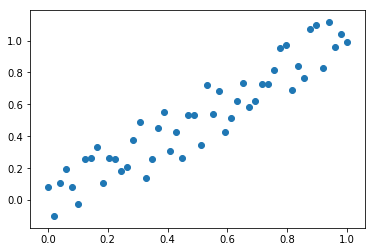

In [12]:
plt.scatter(x,y)

In [13]:
# we have our dataset - we want it to act like a time series.
# split out trn/val sets
x_trn,x_val = x[:40],x[40:]
y_trn,y_val = y[:40],y[40:]

In [ ]:
m = RandomForestRegressor().fit(x_trn, y_trn)

# ValueError: Expected 2D array, got 1D array instead:
# array=[ 0.       0.02041  0.04082  0.06122  0.08163  0.10204  0.12245  0.14286  0.16327  0.18367  0.20408  0.22449
#   0.2449   0.26531  0.28571  0.30612  0.32653  0.34694  0.36735  0.38776  0.40816  0.42857  0.44898  0.46939
#   0.4898   0.5102   0.53061  0.55102  0.57143  0.59184  0.61224  0.63265  0.65306  0.67347  0.69388  0.71429
#   0.73469  0.7551   0.77551  0.79592].
# Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

# need to convert 1d array into 2d array

In [16]:
# x is a rank 1 array => len(x.shape)
# vector is array of rank 1
# matrix is array of rank 2
x.shape

(50,)

In [21]:
# how to turn rank1 array into rank2?
# slice of everything along first axis, None -> add new unit axis here
print(x[:,None].shape)
print(x[...,None].shape) # as many dimensions as necessary, add one to the end
print(x[None,:].shape)
print(x[None].shape) # shortcut for above

x1 = x[...,None]

(50, 1)
(50, 1)
(1, 50)
(1, 50)


In [22]:
x_trn,x_val = x1[:40],x1[40:]

In [23]:
# now it works
m = RandomForestRegressor().fit(x_trn, y_trn)

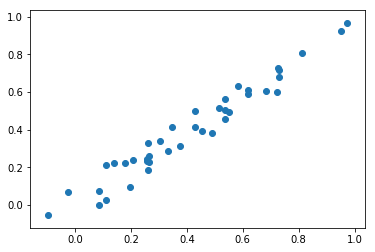

In [24]:
plt.scatter(y_trn, m.predict(x_trn))

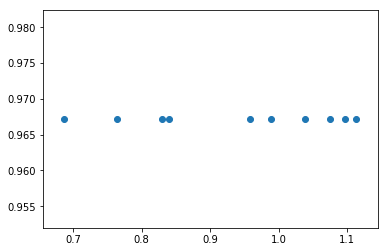

In [25]:
plt.scatter(y_val, m.predict(x_val))

Why didn't it look like above?  RF returns average of nearby observations (in tree-space)  
The above tree has never seen data in that range so it can't return a good average.  
It returns the same highest average it's seen for each row in the dataset
-> all data points traveling along the same pathway in a tree  
Possible solutions:
 - de-trend the data and use the RF to predict that
 - use neural network - functional shape allows extrapolation
 - GBM (gradient boosting machine) - little tree to calculate residuals, next little tree predicts residuals